## Social Media Monitoring with Sentiment Analysis on the Supreme Court’s Overturning on Roe vs. Wade

### Data Preparation: scraping 200,000 tweets from twitter


#### 200,000 tweets are scraped from Twitter to obtain users’ description and text tweeted by users relating to overturning Roe vs Wade. Resource link to get Twitter API Access https://developer.twitter.com/en/docs/twitter-api/getting-started/getting-access-to-the-twitter-api

In [ ]:
import tweepy
#from twitter_authentication import bearer_token
import time
import pandas as pd

pd.set_option('display.max_rows', 300)
pd.set_option('display.width', 1000)
#To get access authorization to scrape data from Twitter api_key, api_key_secret, access_token, 
#access_token_secret is applied and tweepy.OAuthHandler function is called to perform authentication
api_key= insert ''
api_key_secret= ''
access_token=''
access_token_secret= ''

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

# setting keywords and limit = 200000 for query 
keywords = 'Roe OR Wade OR abortion lang:en -is:retweet -RT -has:links -has:media -is:verified'
limit = 200000


tweets = tweepy.Cursor(api.search_tweets,
                       q=keywords,
                       count=100,
                       tweet_mode='extended').items(limit)

In [ ]:
# identifying User, User_description, variables to be scraped from
columns = ['User', 'User_description', 'Tweet_text']
data = []

for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.user.description, tweet.full_text])
    
df = pd.DataFrame(data, columns=columns)
# it will give csv file output to computer with file name RoeVsWade_tweets_200000
filename = "RoeVsWade_tweets_" + str(limit) + ".csv"
df.to_csv(filename,index=False)

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

import nltk
import matplotlib.pyplot as plt
import html
import sklearn.metrics as metrics

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

# classification
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Regression
from sklearn.feature_extraction.text import TfidfVectorizer

# topic modelling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

nltk.download('wordnet')
from nltk.corpus import opinion_lexicon 
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
nltk.download('opinion_lexicon')
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saith\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saith\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\saith\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [2]:
df = pd.read_csv(r"C:\Users\saith\Documents\msads599_capstone\module 5\RoeVsWade_tweets_200000.csv")
df.isnull().sum()


User                    0
User_description    28789
Tweet_text              0
dtype: int64

In [3]:
df = df.dropna()

In [4]:
df.head()

,User,User_description,Tweet_text
0,LifeNewsToo,Project of LifeNews the #1 pro-life web site. ...,Two Tennessee Abortion Businesses Have Already...
1,StevenErtelt,Founder and Editor of https://t.co/vMByGKehw4 ...,Two Tennessee Abortion Businesses Have Already...
2,adhdwonderwoman,I make lots of random “funness” on my other fo...,@LeaderMcConnell Labels are BS .Without hesita...
3,Beautoxx_1,Queer He/Him/His Dream of a better world with ...,@taradublinrocks That’s interesting because wh...
4,bdqyrt,lived from WOKEGE,@AUUUGHHHHHHH @cIeancutz Roe and Wade botlane


### Data Preparation: Obtaining Polarity Score to prepare data for Sentiment Analysis

#### Polarity score is used to quantify positive or negative feelings based on twitter user tweeted text relating to overturning Roe vs Wade. To calculate polarity of a text, each word of the text in the dictionary is added to get an overall polarity score

#### To define polarity score function , here is the resource link for TextBlob(text) https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library/

In [5]:
#TextBlob is used to calculate a sentence's polarity
# polarity_score(text) is used to quantify sentiment with positive or negative value
# defyning polarity_score functio by using def polarity_score(text):

def polarity_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [6]:
# create list from tweeted text with for loop and apply it to polarity_scores function
# append() is used to add a single item to certain collection types.

polarity_scores = list()
for index, row in df.iterrows():
    tweet = row['Tweet_text']
    score = polarity_score(tweet)
    polarity_scores.append(score)

In [7]:
# Polarity column that contained polarity score for each tweeted text by respective users is added to the data frame
df['Polarity'] = polarity_scores

In [8]:
df.head()

,User,User_description,Tweet_text,Polarity
0,LifeNewsToo,Project of LifeNews the #1 pro-life web site. ...,Two Tennessee Abortion Businesses Have Already...,-0.1000
1,StevenErtelt,Founder and Editor of https://t.co/vMByGKehw4 ...,Two Tennessee Abortion Businesses Have Already...,-0.1000
2,adhdwonderwoman,I make lots of random “funness” on my other fo...,@LeaderMcConnell Labels are BS .Without hesita...,-0.0375
3,Beautoxx_1,Queer He/Him/His Dream of a better world with ...,@taradublinrocks That’s interesting because wh...,0.3000
4,bdqyrt,lived from WOKEGE,@AUUUGHHHHHHH @cIeancutz Roe and Wade botlane,0.0000


<AxesSubplot:xlabel='Polarity', ylabel='Count'>

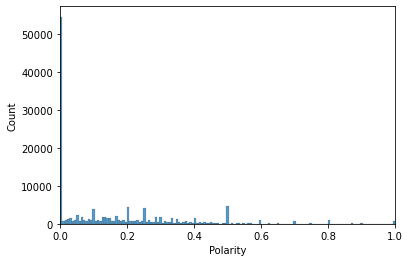

In [9]:
# distribution of polarity scores in a large group of 200,000 tweets
director_plot = sns.histplot(df['Polarity'])
director_plot.set(xlim=(0, 1))
director_plot

## Data Preparation and Aggregation

#### Resources for defining cleaning text function html.unescape(text)  https://www.geeksforgeeks.org/html-unescape-in-python/  re.sub() function : https://www.pythontutorial.net/python-regex/python-regex-sub/

In [12]:
def Textcleaner(text):

    # html. unescape() does replacement for numbers of the reserved HTML characters with its original character 
    text = html.unescape(text)
    
    # to replace the text 
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
   
    return text.strip()
    
    # to remove punctuation
def punctuation_remover(text, exclude=None):
    pset = set(punctuation) 
    pset = pset - exclude
    
    return ''.join([i for i in text if i not in pset])

    # tokenization 

def tokenization(text):

    ret = text.lower()
    ret = ret.split(' ')

    
    return [i for i in ret if i is not '']


    # removing stopwords : to remove the low-level information to get more important information
def remove_stopwords(tokens, exclude):
    sw = set(stopwords.words("english"))
    sw = sw - exclude
    
    return [i for i in tokens if i not in sw]
    
    #lemmatization to normalize text

def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    
    return [lemmatizer.lemmatize(i) for i in tokens]

<>:36: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:36: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-12-4cc02996b2ba>:36: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  return [i for i in ret if i is not '']


In [13]:
df['User_description_cleaned'] = df['User_description'].copy()
df['User_description_cleaned'] = df['User_description_cleaned'].apply(Textcleaner)
df['lammetaized_tokens'] = df['User_description_cleaned'].apply(punctuation_remover, exclude=set()).apply(tokenization).apply(remove_stopwords, exclude=set(['not', 'never', 'nor'])).apply(lemmatize)
df['User_description_cleaned'] = df['lammetaized_tokens'].apply(lambda x: ' '.join(x))
df = df[df['lammetaized_tokens'].str.len() > 5]
df = df[df['Polarity'] != 0.0]

# creating for loop with if polarity score is >1 it is positive feeling, if less than 0 it is negative feeling 


polarity_scores = list()
for index, row in df.iterrows():
    polarity = row['Polarity']
    if polarity > 0:
        polarity_scores.append(1)
    else:
        polarity_scores.append(0)
df['Polarity'] = polarity_scores

## Exploratory Data Analysis

In [14]:
df['Polarity'].value_counts()

1    59884
0    30971
Name: Polarity, dtype: int64

<AxesSubplot:xlabel='Polarity', ylabel='Count'>

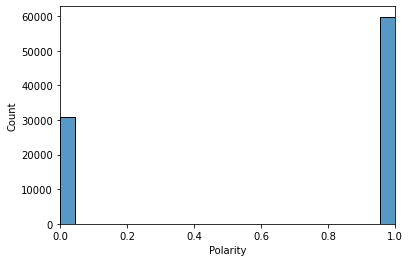

In [15]:

director_plot = sns.histplot(df['Polarity'])
director_plot.set(xlim=(0, 1))
director_plot

### Modeling and Evaluation

In [16]:

#The train_test_split function is used to split arrays or matrices into random subsets for train and test data

X_train, X_test, Y_train, Y_test = train_test_split(df['User_description_cleaned'],
                                                        df['Polarity'],
                                                        test_size=0.2,
                                                        random_state=42)

### TF-IDF (Term-Frequency Inverse Document Frequency)

#### TF-IDF is used to calculate how relevant a word in a series is to a tex. tHow TfidfVectorizer calculate value. Resource : https://www.analyticsvidhya.com/blog/2021/11/how-sklearns-tfidfvectorizer-calculates-tf-idf-values/

In [17]:
tfidf = TfidfVectorizer(min_df = 5, ngram_range=(1,1))
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

In [18]:
type(X_train)

pandas.core.series.Series

### LinearSVC Model and Evaluation

In [19]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
 
model = LinearSVC(C=1., penalty='l1', dual=False)
model = CalibratedClassifierCV(model) 
model.fit(X_train_tf, Y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(dual=False, penalty='l1'))

In [20]:
print ('Accuracy Score using Training set: ', accuracy_score(Y_train, model.predict(X_train_tf)))
Y_pred = model.predict(X_test_tf)
print ('Accuracy Score using Test set: ', accuracy_score(Y_test, Y_pred))

Accuracy Score using Training set:  0.6666941830389082
Accuracy Score using Test set:  0.6625942435749271


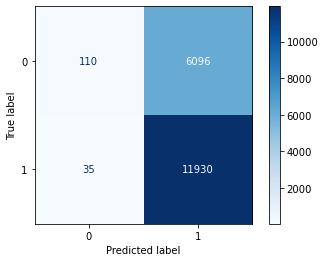

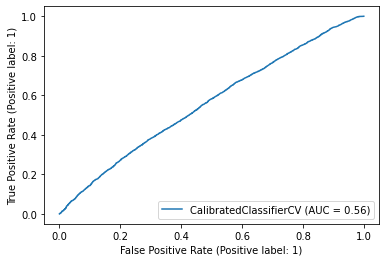

In [21]:
#Confusion Matrix and ROC Curve for Linear SVC

clf = DummyClassifier(strategy='most_frequent')
clf.fit(X_train, Y_train)
Y_pred_baseline = clf.predict(X_test)
Y_pred = model.predict(X_test_tf)

plot_confusion_matrix(model,X_test_tf,
                      Y_test, values_format='d',
                      cmap=plt.cm.Blues)

metrics.plot_roc_curve(model, X_test_tf, Y_test) 
plt.show()


In [22]:
# Cross Validation with 10 folds SVC
import warnings
warnings.filterwarnings('ignore')
X = tfidf.fit_transform(df['User_description_cleaned'])
Y = df['Polarity']
scores = cross_val_score(estimator=model,
                             X=X,
                             y=Y,
                             cv=10)
print ("Validation scores from each iteration of the cross validation ", scores) 
print ("Mean value across of validation scores ", scores.mean())
print ("Standard deviation of validation scores ", scores.std())

Validation scores from each iteration of the cross validation  [0.65903588 0.65914594 0.65914594 0.65903588 0.65914594 0.65910842
 0.65910842 0.65910842 0.65910842 0.65910842]
Mean value across of validation scores  0.6591051677537131
Standard deviation of validation scores  3.826420802636931e-05


In [23]:
# classification report for linear SVC 
from sklearn.metrics import accuracy_score,recall_score
from sklearn.metrics import classification_report
clf.fit(X_train_tf,Y_train)
y_pred = clf.predict(X_test)
print('accuracy %2.2f ' % accuracy_score(Y_test, clf.predict(X_test_tf)))
y_pred = clf.predict(X_test_tf)
print(classification_report(Y_test, y_pred))

accuracy 0.66 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6206
           1       0.66      1.00      0.79     11965

    accuracy                           0.66     18171
   macro avg       0.33      0.50      0.40     18171
weighted avg       0.43      0.66      0.52     18171



### Logistic Regression Model and Evaluation

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
 
model1 =  LogisticRegression()
model1 = CalibratedClassifierCV(model1) 
model1.fit(X_train_tf, Y_train)

print ('Accuracy Score using Training set: ', accuracy_score(Y_train, model1.predict(X_train_tf)))
Y_pred = model1.predict(X_test_tf)
print ('Accuracy Score using Test set: ', accuracy_score(Y_test, Y_pred))

Accuracy Score using Training set:  0.6682075835121898
Accuracy Score using Test set:  0.6646854878652798


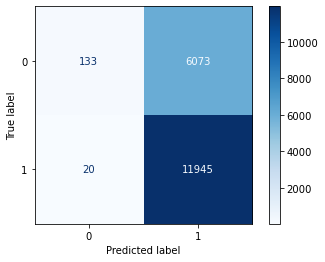

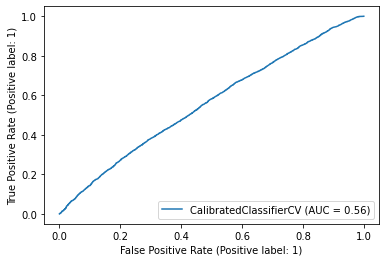

In [25]:
#Confusion Matrix and ROC Curve for Logistic Regression
clf = DummyClassifier(strategy='most_frequent')
clf.fit(X_train, Y_train)
Y_pred_baseline = clf.predict(X_test)
Y_pred = model.predict(X_test_tf)

plot_confusion_matrix(model1,X_test_tf,
                      Y_test, values_format='d',
                      cmap=plt.cm.Blues)


metrics.plot_roc_curve(model, X_test_tf, Y_test) 
plt.show()

## Predictive SVC model for the stance toward overturning of Roe vs. Wade on an individual tweet and based on user description

#### use predict() and predict_proba() functions with the  SVC machine learning model to get the result of positive and negative feeling on overturning of Roe vs. Wade 

In [28]:
#tweet = "ENTER twitter user description here:". 
# use apply() function to act like a map takes a function as an input and applies this function to an entire DataFrame
# apply >6 tokens to make sure getting enough words in user description for prediction
# use if statement to get 1 = positive feeling and else negative feeling

tweet = "ENTER twitter user description here:" 
tweet = pd.Series(tweet)
tweet = tweet.apply(punctuation_remover, exclude=set()).apply(tokenization).apply(remove_stopwords, exclude=set(['not', 'never', 'nor'])).apply(lemmatize)
n_tokens = tweet.str.len().iloc[0]
if n_tokens > 6:
    tweet = tweet.apply(lambda x: ' '.join(x))

    tweet_test_tf = tfidf.transform(tweet)
    
    sentiment_pred = model.predict(tweet_test_tf)
    
    sentiment_proba = model.predict_proba(tweet_test_tf)
    
    if sentiment_pred   == 1:
        print("Positive")
    else:
        print("Negative")
    print(sentiment_pred, sentiment_proba)
else:
    print("The user profile/description is too short")

The user profile/description is too short
